# Principal Components Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

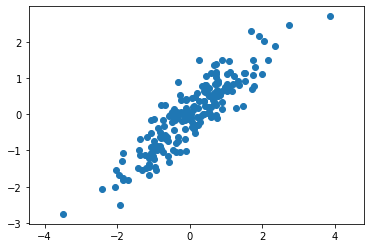

In [2]:
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

plt.show()

## Part 1: Principal Components Analysis (PCA) by Hand

### Step 1: Center Each Data Point on the Mean

Subtract the means, since we are concerned about capturing only variance.

In [3]:
x1 = X[:,0]
x2 = X[:,1]

data = pd.DataFrame([x1,x2]).transpose()
data.columns = ['x1', 'x2']
data.head()

mean_centered = data - data.mean()
mean_centered.head()

,x1,x2
0,-1.440117,-1.004084
1,-1.021944,-0.740755
2,1.038483,1.456373
3,0.733252,0.861408
4,0.271179,-0.043246


### Step 2: Compute the Eigenvectors of the Covariance Matrix

Here we compute the covariance matrix of the mean-centered datapoints, and sort the eigenvectors according to the eigenvalues.  We can see the resulting eigenvectors and eigenvalues.

In [4]:
cov = np.cov([mean_centered['x1'], mean_centered['x2']])
cov

array([[1.05592178, 0.85869573],
       [0.85869573, 0.87581538]])

In [5]:
eigen_value, eigen_vector = np.linalg.eig(cov)
eigen_vector

array([[ 0.74306799, -0.66921593],
       [ 0.66921593,  0.74306799]])

In [6]:
# Get the index values of the sorted eigenvalues
e_indices = np.argsort(eigen_value)[::-1] 

# Sort
eigenvectors_sorted = eigen_vector[:, e_indices]
eigenvectors_sorted

array([[ 0.74306799, -0.66921593],
       [ 0.66921593,  0.74306799]])

### Step 3: Project the Original Data onto the Eigenvectors.

In [7]:
pcs = eigenvectors_sorted.dot(mean_centered.T).T
pcs[:5]

array([[-0.39815576, -1.70985165],
       [-0.26364886, -1.23433297],
       [-0.20296445,  1.77715345],
       [-0.03161223,  1.13078875],
       [ 0.23044574,  0.14934255]])

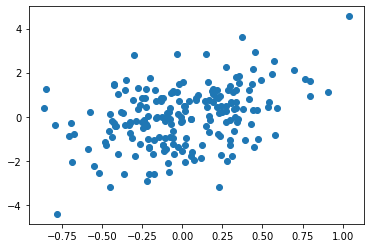

In [8]:
plt.scatter(pcs[:,0],pcs[:,1])
plt.show()

## Part 2: PCA with Scikit-Learn

In [9]:
pca = PCA(n_components=2)
pca.fit(X)

print(pca.components_)

[[ 0.74306799  0.66921593]
 [-0.66921593  0.74306799]]


In [10]:
print(pca.explained_variance_)

[1.82927343 0.10246373]


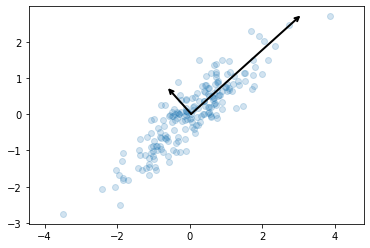

In [11]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

original shape:    (200, 2)
transformed shape: (200, 1)


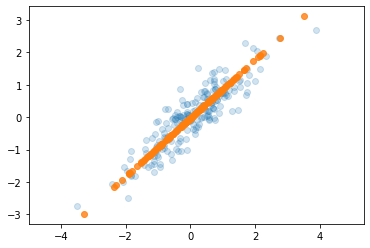

In [12]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)


X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

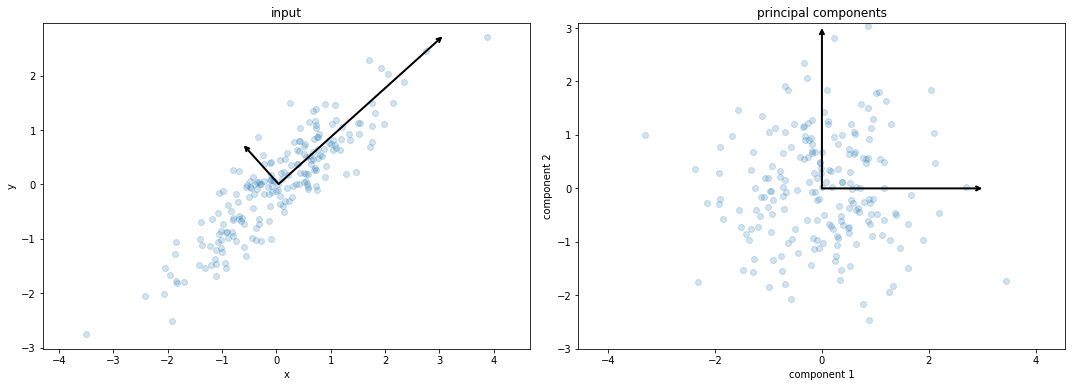

In [13]:
pca = PCA(n_components=2, whiten=True)

pca.fit(X)
X_pca = pca.transform(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

plt.show()

### How Many Principal Components?

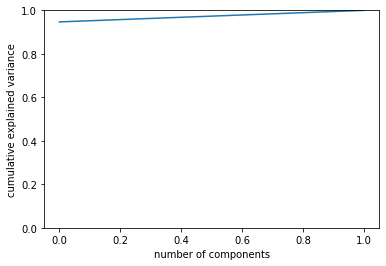

In [14]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim([0,1])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Principal Component Analysis

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

## PCA on FCC Measuring Broadband America Data

Let's have a look at how Principal Component Analysis (PCA) can help us understand relationships between throughput ("speed"), web download speed, and latency. Let's first explore PCA in two dimensions before heading to three dimensions. We'll look at the throughput test and latency first, for a particular Internet destination server in the dataset `samknows1.nyc2.level3.net`.

### PCA in Two Dimensions (Throughput and Latency)

In [16]:
dfh = pd.read_csv('../data/curr_httpgetmt.csv.gz', compression='gzip', error_bad_lines=False)
dfp = pd.read_csv('../data/curr_ping.csv.gz', compression='gzip', error_bad_lines=False)

dfh = dfh.loc[:,['unit_id','dtime','target','address','bytes_sec']]
dfh = dfh[(dfh['dtime'] < '2020-03-10') & (dfh['target']=='samknows1.nyc2.level3.net')]

dfp = dfp.loc[:,['unit_id','dtime','target','rtt_avg']]
dfp = dfp[(dfp['dtime'] < '2020-03-10') & (dfp['target']=='samknows1.nyc2.level3.net')]

In [17]:
dfh.head()

,unit_id,dtime,target,address,bytes_sec
0,386,2020-03-01 00:35:07,samknows1.nyc2.level3.net,4.71.185.62,18693531
3,386,2020-03-01 01:35:10,samknows1.nyc2.level3.net,4.71.185.62,20522792
6,386,2020-03-01 02:39:52,samknows1.nyc2.level3.net,4.71.185.62,21314905
8,386,2020-03-01 03:34:56,samknows1.nyc2.level3.net,4.71.185.62,21955952
10,386,2020-03-01 04:34:51,samknows1.nyc2.level3.net,4.71.185.62,23254307


Let's merge on unit ID to get a mean value for throughput and latency for each device to this server. 

In [18]:
df = dfh.merge(dfp, on='unit_id')

dfa = df.groupby(['unit_id']).mean().reset_index()
dfa.head()

print('{} measurements.'.format(dfa.count()[0]))

1256 measurements.


There are about 100 outliers in the dataset of latencies that exceed 100 milliseonds to the nearby measurements server, which we'll remove just to make visualization easier.  You can skip this step without affecting any results.

In [19]:
dfa[dfa['rtt_avg']/1000 > 100].sort_values(by='rtt_avg')

,unit_id,bytes_sec,rtt_avg
789,3880461,1.507096e+05,1.001736e+05
1175,26226437,2.935638e+05,1.041453e+05
414,660262,8.790900e+04,1.056482e+05
853,3941649,1.866599e+05,1.062451e+05
673,1006300,3.558097e+05,1.065609e+05
...,...,...,...
375,614184,4.815174e+05,8.221785e+05
515,941776,1.427580e+06,8.591251e+05
863,3941937,6.172092e+04,8.800463e+05
571,949158,1.452355e+06,9.288780e+05


In [20]:
dfa = dfa[dfa['rtt_avg']/1000 < 100]

Let's have a quick look at the data.

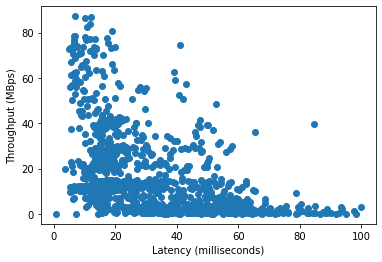

In [21]:
plt.scatter(dfa['rtt_avg']/1000,dfa['bytes_sec']/1000000)
plt.xlabel('Latency (milliseconds)')
plt.ylabel('Throughput (MBps)')
plt.show()

We can then perform PCA on these datapoints to re-orient the data along the axis with the highest variance.

In [22]:
X = dfa.loc[:,['rtt_avg','bytes_sec']]

pca = PCA(n_components=2,whiten=True)
pca.fit(X)
X_pca = pca.transform(X)

The plots below show the original data with vectors pointing in the direction of highest variance, and an affine transofrmation of the data to capture the data projected onto the principal components that capture the highest variance and the vector that is orthogonal to that first principal component vector.

In [23]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

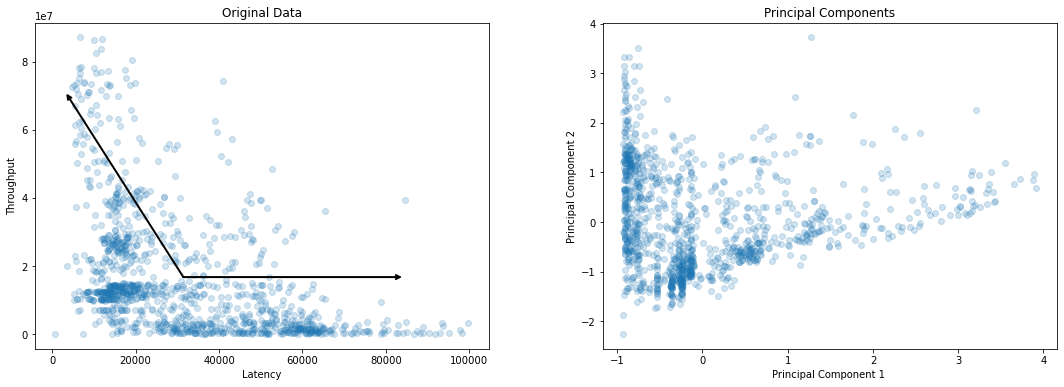

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.25)

# plot data
ax[0].scatter(X.values[:,0], X.values[:,1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].set(xlabel='Latency', ylabel='Throughput', title='Original Data')

ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
ax[1].set(xlabel='Principal Component 1 ', ylabel='Principal Component 2',
          title='Principal Components')

plt.show()

You can see how these principal components capture the variance of the underlying features.

In [25]:
PCs = pd.DataFrame(pca.components_, columns=X.columns)
PCs['explained variance'] = pca.explained_variance_ratio_
PCs

,rtt_avg,bytes_sec,explained variance
0,-0.00052,1.00000,9.999991e-01
1,1.00000,0.00052,9.433894e-07


### PCA in Three Dimensions

When we get to higher dimensions, the relationships between the data can be harder to visualize.  Let's also look at web page load time.

In [27]:
dfw = pd.read_csv('../data/curr_webget.csv.gz', compression='gzip', error_bad_lines=False)
dfw.head(5)

EOFError: Compressed file ended before the end-of-stream marker was reached

In [ ]:
dfw.shape

We will take the aberage of all web page load measurements per unit and then merge that with the other two dimensions we already have to yield a matrix with three different dimensions.

In [29]:
df_webavg = dfw.groupby('unit_id')['bytes_sec'].mean()

dfa = dfa.merge(df_webavg,on='unit_id',suffixes=('_speed','_web'))
dfa

,unit_id,bytes_sec_speed,rtt_avg,bytes_sec_web
0,386,2.046803e+07,10999.268657,2.427202e+05
1,390,1.172699e+07,12892.975000,2.314104e+05
2,477,7.123212e+06,13410.346154,2.329237e+05
3,519,2.080405e+07,49646.976190,2.268089e+05
4,566,1.435002e+07,20046.893048,2.786500e+05
...,...,...,...,...
1155,32833337,2.913195e+07,36083.483333,1.289696e+06
1156,32833345,2.412087e+07,16341.774194,1.327126e+06
1157,32833361,8.577048e+06,41786.818182,1.177267e+06
1158,32833389,7.330345e+07,18668.005236,1.371928e+06


### Visualizing the Original Data with Pairwise Plots

Now let's suppose we wanted to visualize the relationship between all combinations of features.  This is getting more challenging, but still doable, as shown below.

It's possible to see that there's an inverse relationship between the bytes per second of the speed test and latency, for example.  It's also possible to see that speeds of web page loads "plateau" after a certain level of throughput speed.

(Note that there are really only three relationships worth looking at below. The automated code plots all permutations of pairs for ease of reuse and visualization.)

In [30]:
X = dfa.loc[:,['rtt_avg','bytes_sec_speed','bytes_sec_web']]

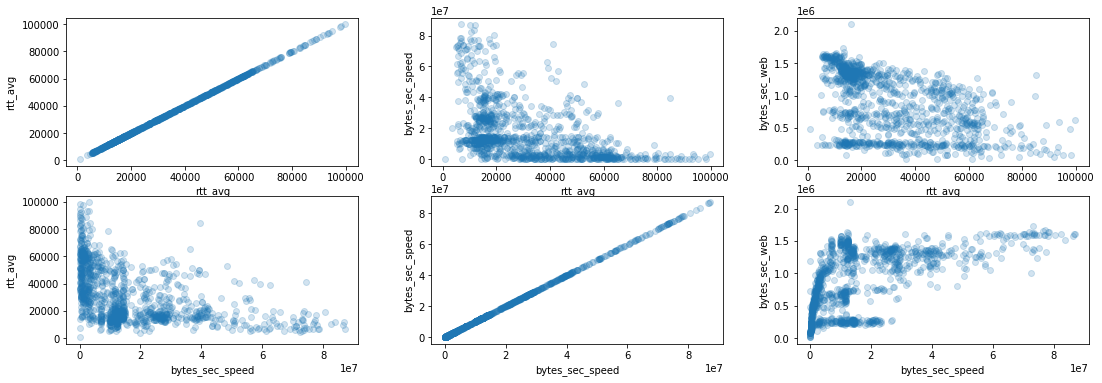

In [31]:
from itertools import product 

fig, ax = plt.subplots(2,3, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.25)

for (i,j) in product(np.arange(0,2),np.arange(0,3)):
    ax[i][j].scatter(X.values[:,i], X.values[:,j], alpha=0.2)
    ax[i][j].set(xlabel='Latency', ylabel='Throughput')
    ax[i][j].set_xlabel('{}'.format(X.columns[i]))
    ax[i][j].set_ylabel('{}'.format(X.columns[j]))

### Understanding the Data with PCA

PCA allows us to visualize these relationships with fewer dimensions. We can see that the first principal component is mostly in the direction of speed, and the second principal component is mostly in the direction of web page throughput. Most of the variance of the original data is captured by speed, and almost all of the remaining variance is captured by Web speed.  

This is reflected in both the loading factors and in the visualization.

In [32]:
pca = PCA(n_components=2,whiten=True)
pca.fit(X)
X_pca = pca.transform(X)

In [33]:
PCs = pd.DataFrame(pca.components_, columns=X.columns)
PCs['explained variance'] = pca.explained_variance_ratio_
PCs

,rtt_avg,bytes_sec_speed,bytes_sec_web,explained variance
0,-0.000520,0.999879,0.015524,0.999536
1,-0.014007,-0.015529,0.999781,0.000463


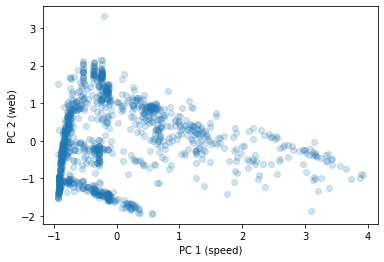

In [34]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
plt.xlabel('PC 1 (speed)')
plt.ylabel('PC 2 (web)')
plt.show()